## Introduction
Understanding and predicting energy consumption is crucial for optimizing resource utilization, reducing costs, and minimizing environmental impact. In this analysis, we delve into a dataset containing information on energy consumption along with various environmental and operational factors such as temperature, humidity, occupancy, and usage of HVAC and lighting systems. Our objective is to perform an Exploratory Data Analysis (EDA) to uncover insights into energy consumption patterns and subsequently develop predictive models to forecast future energy usage.

The dataset provides a comprehensive view of energy consumption dynamics over time, allowing us to explore how different factors influence energy demand. By examining the relationships between energy consumption and environmental variables like temperature and humidity, as well as operational factors such as occupancy and usage of HVAC and lighting systems, we aim to identify key drivers of energy consumption and understand their impact.

Through EDA, we will visualize the distribution of variables, investigate correlations between features and energy consumption. These insights will guide the development of predictive models capable of forecasting energy consumption accurately.By leveraging regression models, we aim to build robust models that can effectively predict future energy usage based on historical data and contextual factors. Evaluation metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and Rsquared (R^2) will be used to assess the performance of the models and ensure their reliability.

Ultimately, the findings from this analysis can inform decision-making processes related to energy management, enabling stakeholders to optimize resource allocation, improve energy efficiency, and make informed decisions towards sustainability goals.

In [1]:
#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
print("Libraries imported")

Libraries imported


In [2]:
#Load data
df=pd.read_csv("C:\\Users\\NIDHI RANJAN\\Downloads\\Energy_consumption.csv")

In [3]:
df.head()

,Timestamp,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption
0,2022-01-01 00:00:00,25.139433,43.431581,1565.693999,5,On,Off,2.774699,Monday,No,75.364373
1,2022-01-01 01:00:00,27.731651,54.225919,1411.064918,1,On,On,21.831384,Saturday,No,83.401855
2,2022-01-01 02:00:00,28.704277,58.907658,1755.715009,2,Off,Off,6.764672,Sunday,No,78.270888
3,2022-01-01 03:00:00,20.080469,50.371637,1452.316318,1,Off,On,8.623447,Wednesday,No,56.519850
4,2022-01-01 04:00:00,23.097359,51.401421,1094.130359,9,On,Off,3.071969,Friday,No,70.811732


In [4]:
df.info

<bound method DataFrame.info of                Timestamp  Temperature   Humidity  SquareFootage  Occupancy  \
0    2022-01-01 00:00:00    25.139433  43.431581    1565.693999          5   
1    2022-01-01 01:00:00    27.731651  54.225919    1411.064918          1   
2    2022-01-01 02:00:00    28.704277  58.907658    1755.715009          2   
3    2022-01-01 03:00:00    20.080469  50.371637    1452.316318          1   
4    2022-01-01 04:00:00    23.097359  51.401421    1094.130359          9   
..                   ...          ...        ...            ...        ...   
995  2022-02-11 11:00:00    28.619382  48.850160    1080.087000          5   
996  2022-02-11 12:00:00    23.836647  47.256435    1705.235156          4   
997  2022-02-11 13:00:00    23.005340  48.720501    1320.285281          6   
998  2022-02-11 14:00:00    25.138365  31.306459    1309.079719          3   
999  2022-02-11 15:00:00    23.051165  42.615421    1018.140606          6   

    HVACUsage LightingUsage  Re

In [5]:
df.describe()

,Temperature,Humidity,SquareFootage,Occupancy,RenewableEnergy,EnergyConsumption
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,24.982026,45.395412,1500.052488,4.581000,15.132813,77.055873
std,2.836850,8.518905,288.418873,2.865598,8.745917,8.144112
min,20.007565,30.015975,1000.512661,0.000000,0.006642,53.263278
25%,22.645070,38.297722,1247.108548,2.000000,7.628385,71.544690
50%,24.751637,45.972116,1507.967426,5.000000,15.072296,76.943696
75%,27.418174,52.420066,1740.340165,7.000000,22.884064,82.921742
max,29.998671,59.969085,1999.982252,9.000000,29.965327,99.201120


In [6]:
df.shape

(1000, 11)

In [7]:
df1=df

## DATA PREPROCESSING

In [8]:
columns_to_remove = ['Timestamp', 'DayOfWeek', 'Holiday']
df = df.drop(columns=columns_to_remove)

Timestamp: This column is not relevant for the multiple regression model, as it only provides a time-based context and does not contribute to the prediction of EnergyConsumption.

DayOfWeek: This column is likely to be correlated with Occupancy, as occupancy patterns may vary by day of the week. Removing this column can help avoid multicollinearity.

Holiday: Similar to DayOfWeek, this column may be correlated with Occupancy, and removing it can help simplify the model.

In [9]:
##Checking null values
df.isnull().sum()

Temperature          0
Humidity             0
SquareFootage        0
Occupancy            0
HVACUsage            0
LightingUsage        0
RenewableEnergy      0
EnergyConsumption    0
dtype: int64

In [11]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'data' is the DataFrame containing the data
categorical_cols = ['HVACUsage', 'LightingUsage']

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    
df.head()

,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,EnergyConsumption
0,25.139433,43.431581,1565.693999,5,1,0,2.774699,75.364373
1,27.731651,54.225919,1411.064918,1,1,1,21.831384,83.401855
2,28.704277,58.907658,1755.715009,2,0,0,6.764672,78.270888
3,20.080469,50.371637,1452.316318,1,0,1,8.623447,56.519850
4,23.097359,51.401421,1094.130359,9,1,0,3.071969,70.811732


In [12]:
# Check for outliers using the Z-score method
from scipy import stats
z_scores = np.abs(stats.zscore(df))
print("Outliers:")
print(np.where(z_scores > 3))

Outliers:
(array([], dtype=int64), array([], dtype=int64))


It seems that there are no missing values or outliers in the data that need to be handled.

In [13]:
from sklearn.preprocessing import StandardScaler

# Identify numerical columns to be standardized
numerical_cols = ['Temperature', 'Humidity', 'SquareFootage', 'RenewableEnergy', 'EnergyConsumption']

# Standardize the numerical columns
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Display the first few rows to confirm the changes
df.head()


,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,EnergyConsumption
0,0.055514,-0.230642,0.227705,5,1,0,-1.413722,-0.207800
1,0.969738,1.037096,-0.308690,1,1,1,0.766292,0.779601
2,1.312764,1.586942,0.886871,2,0,0,-0.957284,0.149264
3,-1.728681,0.584431,-0.165593,1,0,1,-0.744647,-2.522841
4,-0.664684,0.705374,-1.408109,9,1,0,-1.379716,-0.767090


## Exploratory Data Analysis (EDA)

Analyze Relationships Between Energy Consumption and Independent Variables:Using scatter plots, histogram,boxplot, pairplot for numerical variables and bar plots as well as countplot for categorical variables to visualize relationships. Even analyze correlation between variables using correlation matrix and visualize using heatmap.

Scatter Plots for Numerical Variables

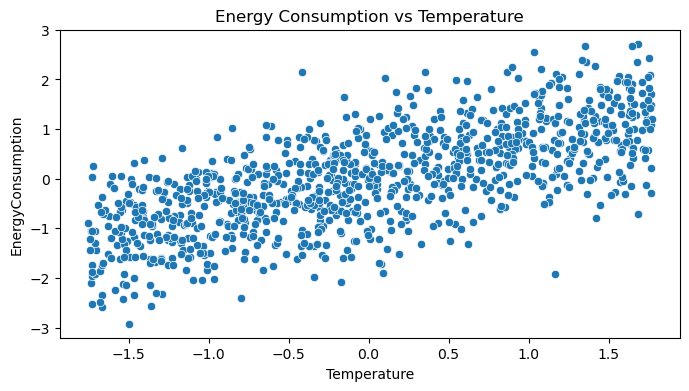

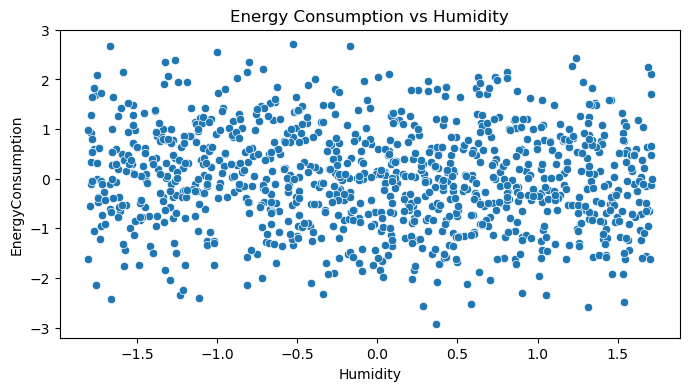

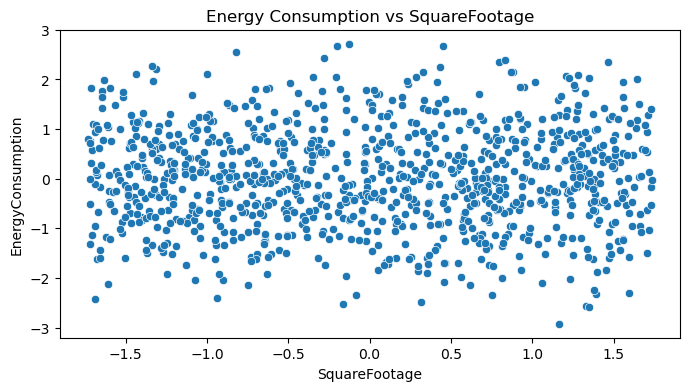

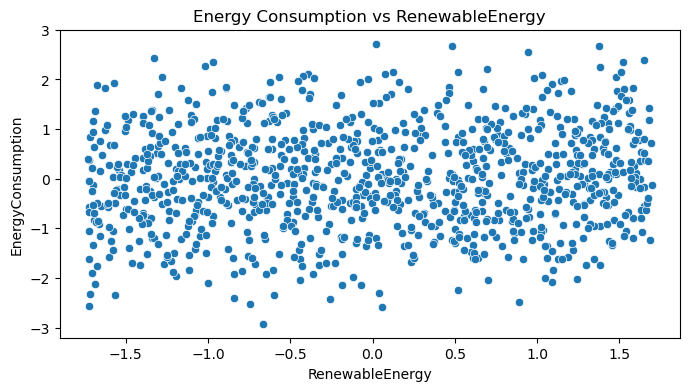

In [14]:
# Scatter plot for numerical variables
for col in numerical_cols:
    if col != 'EnergyConsumption':
        plt.figure(figsize=(8, 4))
        sns.scatterplot(data=df, x=col, y='EnergyConsumption')
        plt.title(f'Energy Consumption vs {col}')
        plt.show()


Temperature vs Energy Consumption: A scatter plot of Temperature vs EnergyConsumption show that higher  temperatures lead to increased energy usage.

Humidity vs Energy Consumption: Changes in Humidity is not correlated with changes in EnergyConsumption.

SquareFootage vs Energy Consumption: This scatter plot does not reveal if larger buildings (higher square footage) have higher energy consumption.

RenewableEnergy vs Energy Consumption: A scatter plot here determine that higher renewable energy usage affects overall energy consumption.

 Bar Plots for Categorical Variables

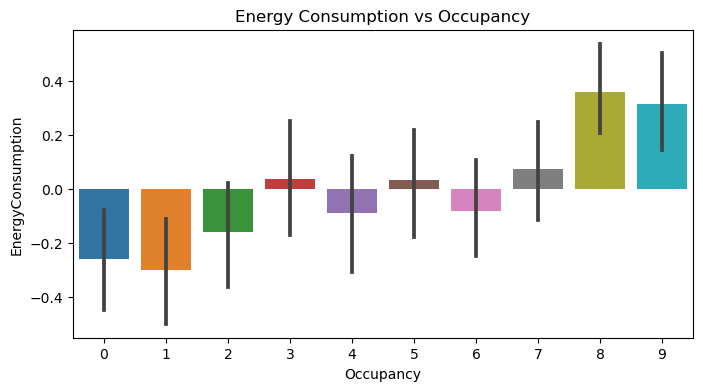

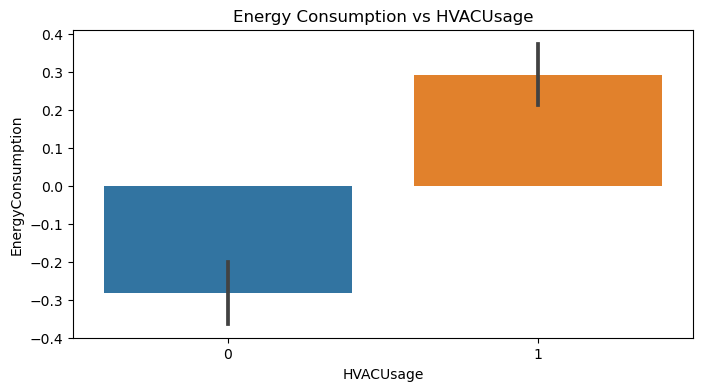

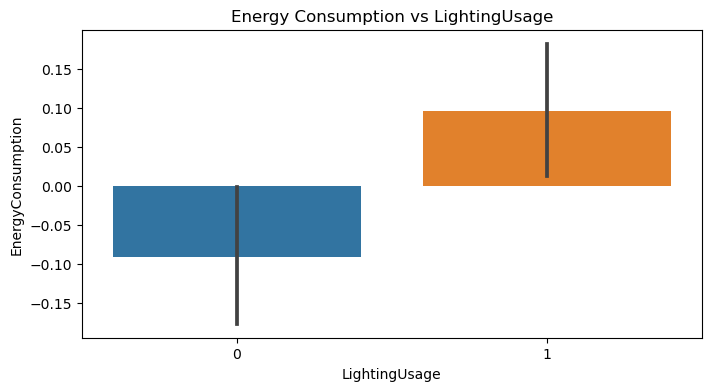

In [15]:
# Bar plot for categorical variables
categorical_cols = [col for col in df.columns if col not in numerical_cols]
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.barplot(data=df, x=col, y='EnergyConsumption')
    plt.title(f'Energy Consumption vs {col}')
    plt.show()

In [16]:
corr_matrix = df.corr()
print(corr_matrix['EnergyConsumption'].sort_values(ascending=False))

EnergyConsumption    1.000000
Temperature          0.696410
HVACUsage            0.286464
Occupancy            0.186580
LightingUsage        0.093423
RenewableEnergy      0.081160
SquareFootage       -0.001129
Humidity            -0.093583
Name: EnergyConsumption, dtype: float64


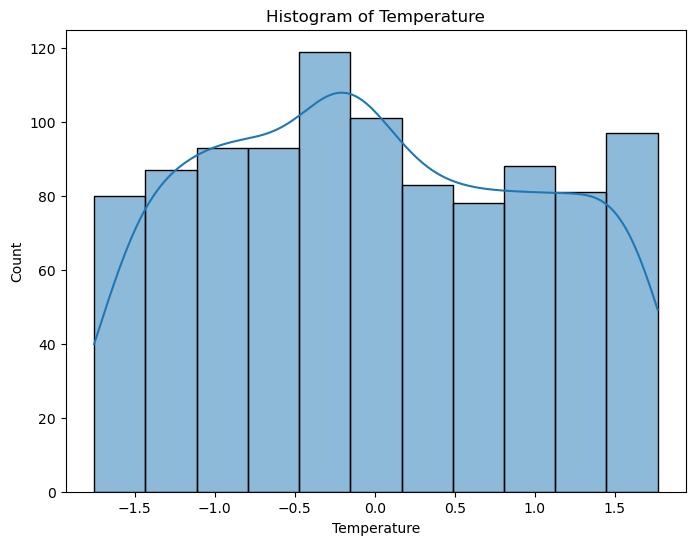

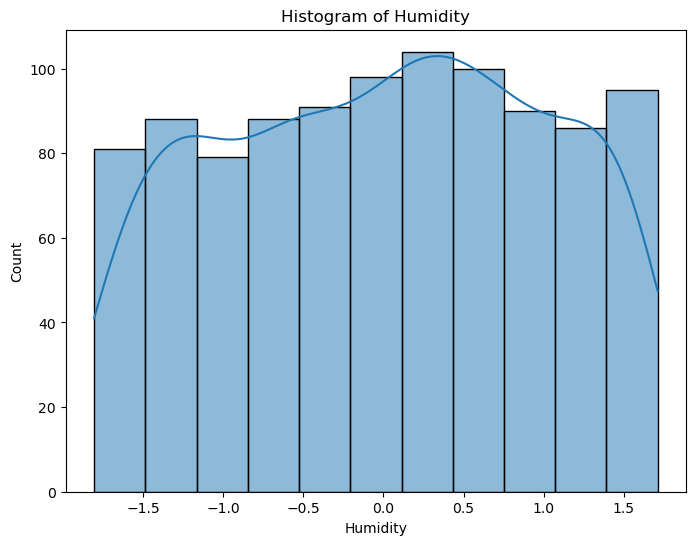

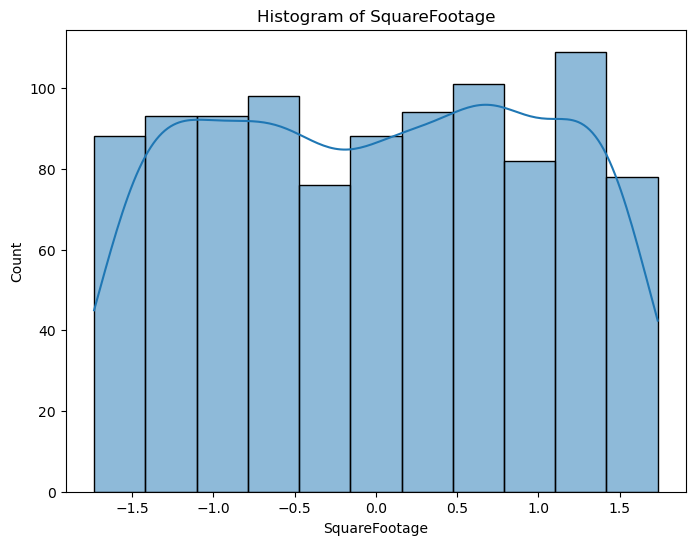

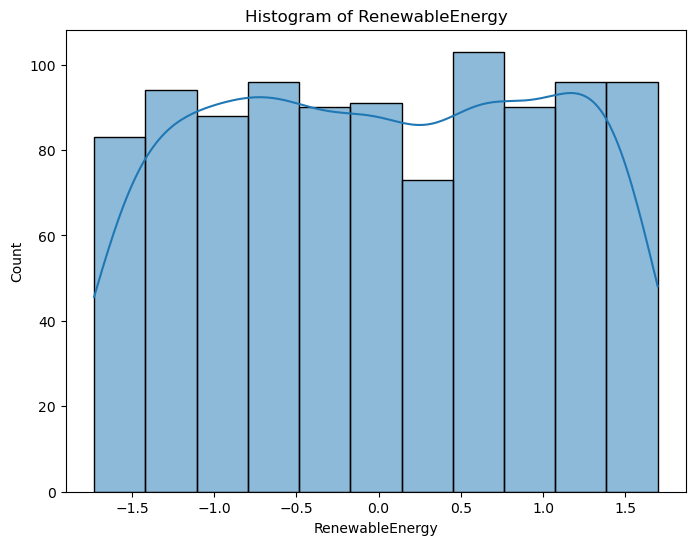

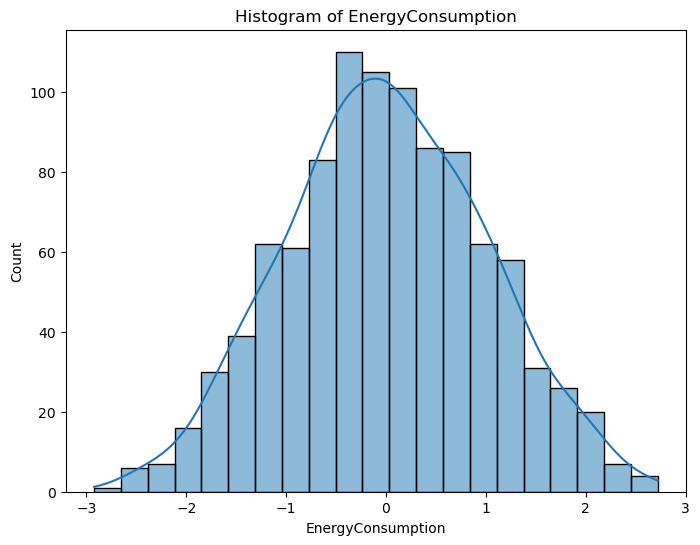

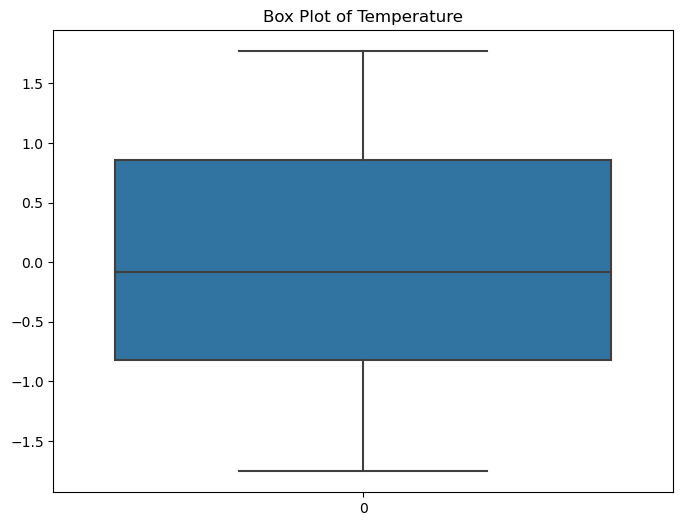

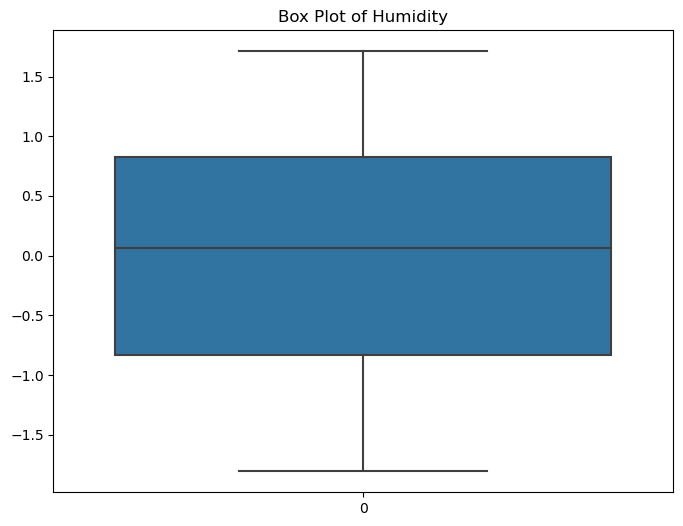

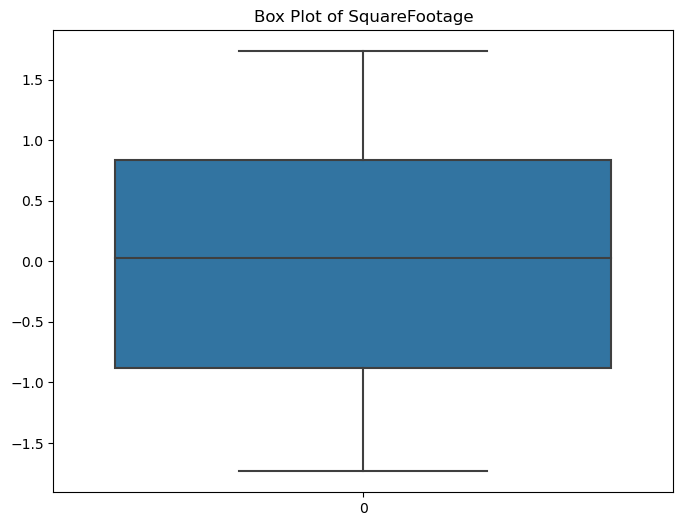

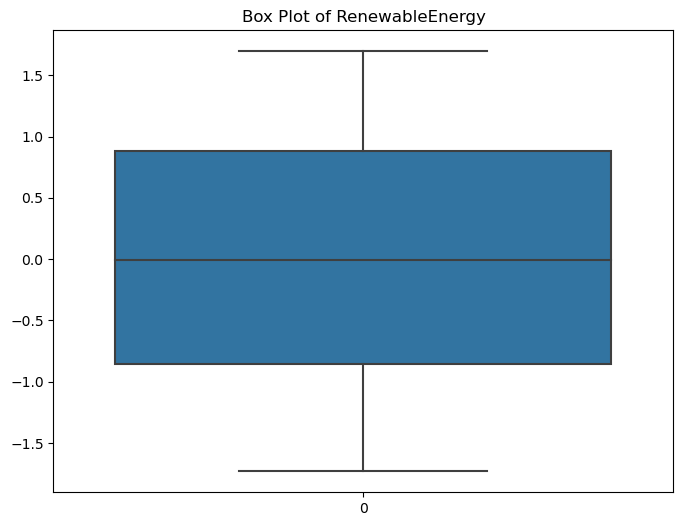

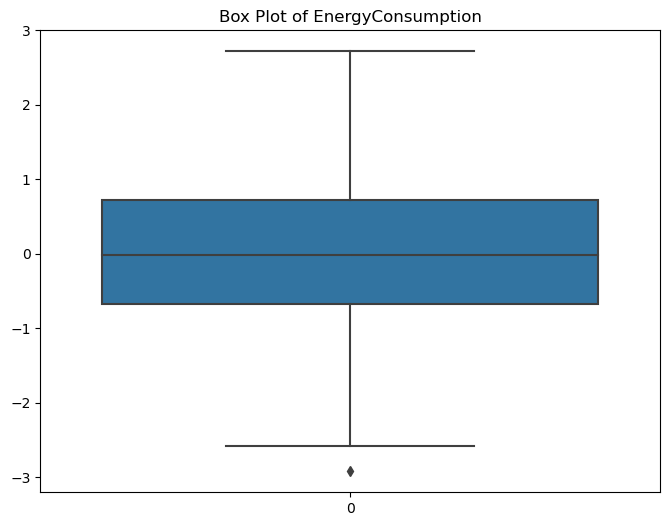

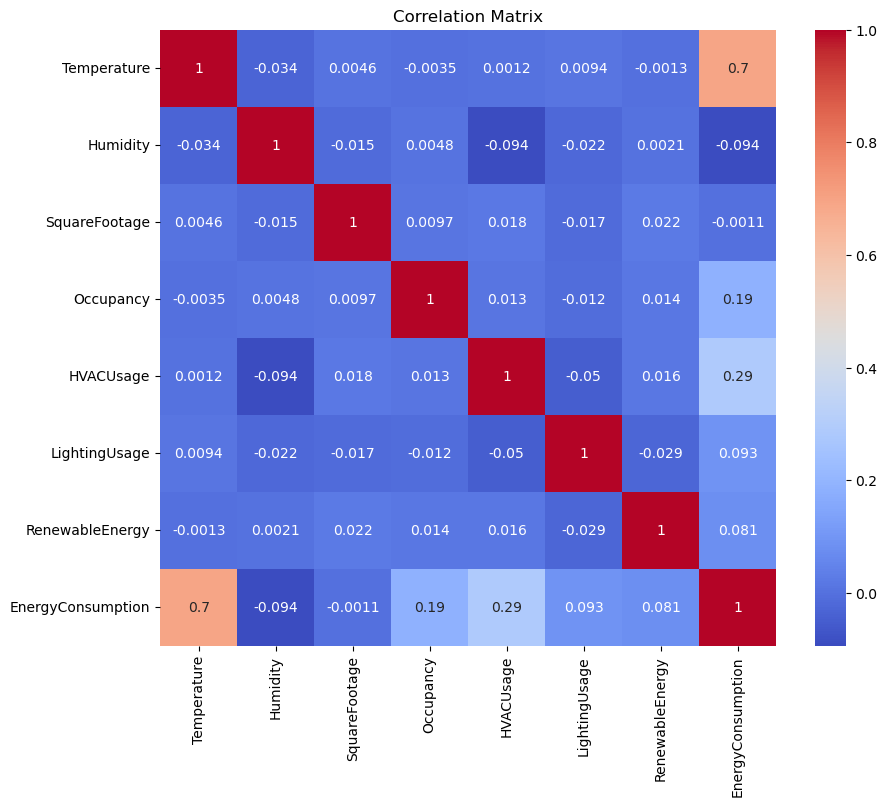

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


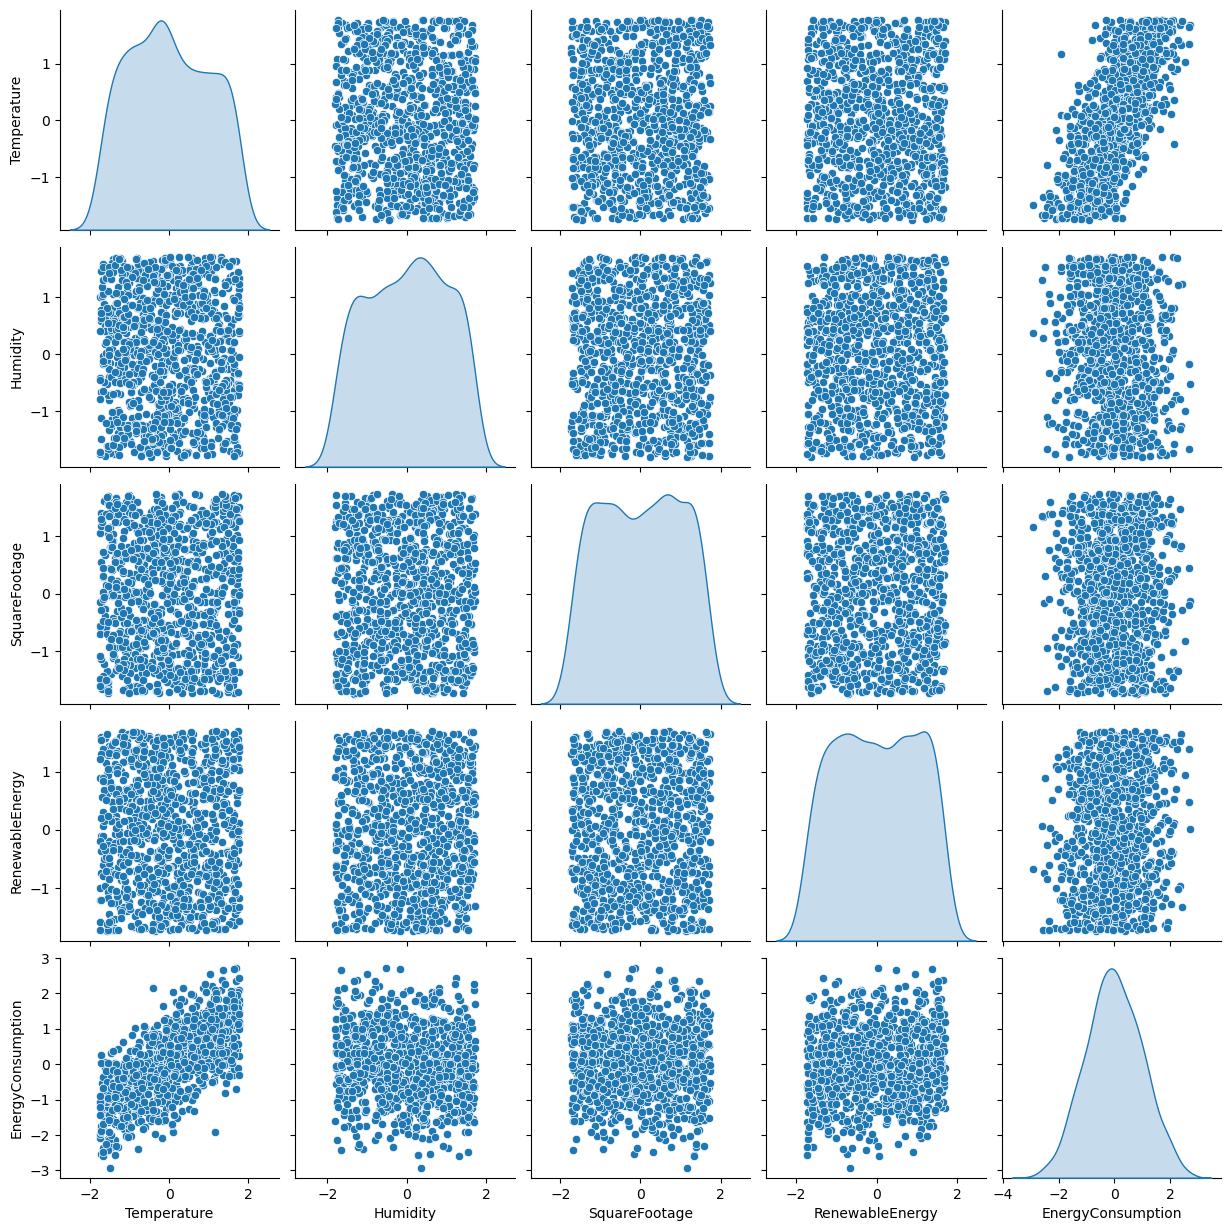

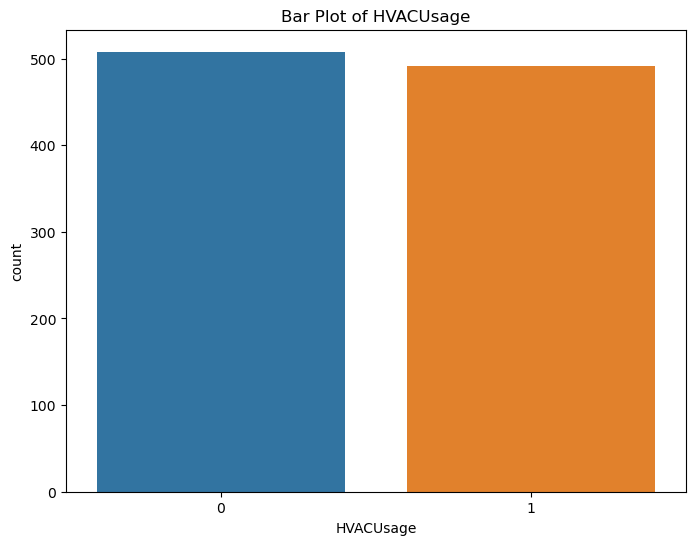

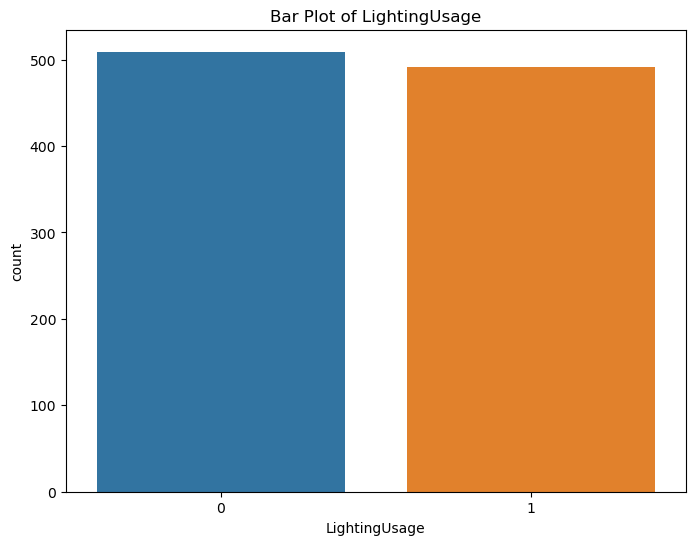

In [17]:
# Histograms for numerical columns
numerical_cols = ['Temperature', 'Humidity', 'SquareFootage', 'RenewableEnergy', 'EnergyConsumption']

for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f"Histogram of {col}")
    plt.show()

# Box plots for numerical columns
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(df[col])
    plt.title(f"Box Plot of {col}")
    plt.show()

# Heatmap for correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", square=True)
plt.title("Correlation Matrix")
plt.show()

# Pairplot for relationships between columns
sns.pairplot(df, vars=numerical_cols, diag_kind="kde")
plt.show()

# Bar plots for categorical columns
categorical_cols = ['HVACUsage', 'LightingUsage']

for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, data=df)
    plt.title(f"Bar Plot of {col}")
    plt.show()




Histograms: We create histograms for each numerical column using sns.histplot() to visualize the distribution of values. All the histograms shows that the model is normally distributed.

Box plots: We create box plots for each numerical column using sns.boxplot() to visualize the distribution of values and detect outliers.From the boxplot, we can see that there are no significant outliers which was even checked before using Zscore.

Heatmap: We create a heatmap of the correlation matrix using sns.heatmap() to visualize the relationships between columns.It shows that temperature is highly correlated with energy consumption whereas humidity is the least.

Pairplot: We create a pairplot using sns.pairplot() to visualize the relationships between numerical columns.

Bar plots: We create bar plots for each categorical column using sns.countplot() to visualize the distribution of values.It shows that LightingUsage and HVACUsage is equally distributed.


## MULTICOLLINEARITY AND AUTOCORRELATION TEST

In [18]:
## CHECK FOR MULTICOLLINEARITY
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
X = df.drop(columns=['EnergyConsumption'])  # Exclude the dependent variable
X['Intercept'] = 1  # Add intercept for statsmodels

vif_df = pd.DataFrame()
vif_df['Feature'] = X.columns
vif_df['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Print VIF values
print(vif_df)


           Feature       VIF
0      Temperature  1.001267
1         Humidity  1.011036
2    SquareFootage  1.001334
3        Occupancy  1.000590
4        HVACUsage  1.012352
5    LightingUsage  1.004525
6  RenewableEnergy  1.001717
7        Intercept  5.605116


No multicollinearity present as VIF is less than 10

In [19]:
## CHECK FOR AUTOCORRELATION
import statsmodels.api as sm

# Prepare the data for regression
X = df.drop(columns=['EnergyConsumption'])
y = df['EnergyConsumption']

# Fit the model
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

# Perform Durbin-Watson test
from statsmodels.stats.stattools import durbin_watson
dw_test = durbin_watson(model.resid)

print('Durbin-Watson Test:', dw_test)


Durbin-Watson Test: 2.0231791174624805


It indicates no autocorrelation

## MODEL TRAINING AND EVALUATION

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Prepare the data for regression
X = df.drop(columns=['EnergyConsumption'])
y = df['EnergyConsumption']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the multiple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)


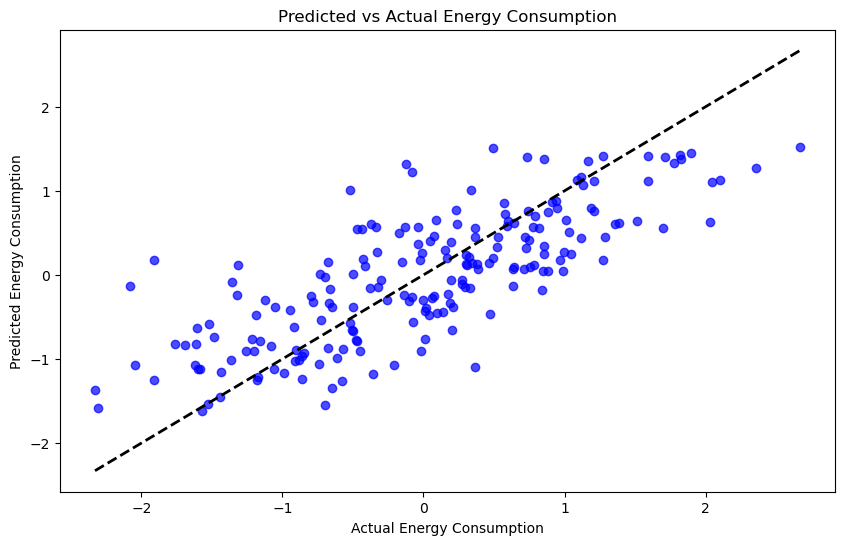

In [21]:
# Plotting predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='b')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
plt.xlabel('Actual Energy Consumption')
plt.ylabel('Predicted Energy Consumption')
plt.title('Predicted vs Actual Energy Consumption')
plt.show()


Predicted vs Actual Values Plot: This scatter plot shows how well the model's predictions align with the actual values. The closer the points are to the diagonal line, the better the model's performance which can be seen from the above plot.

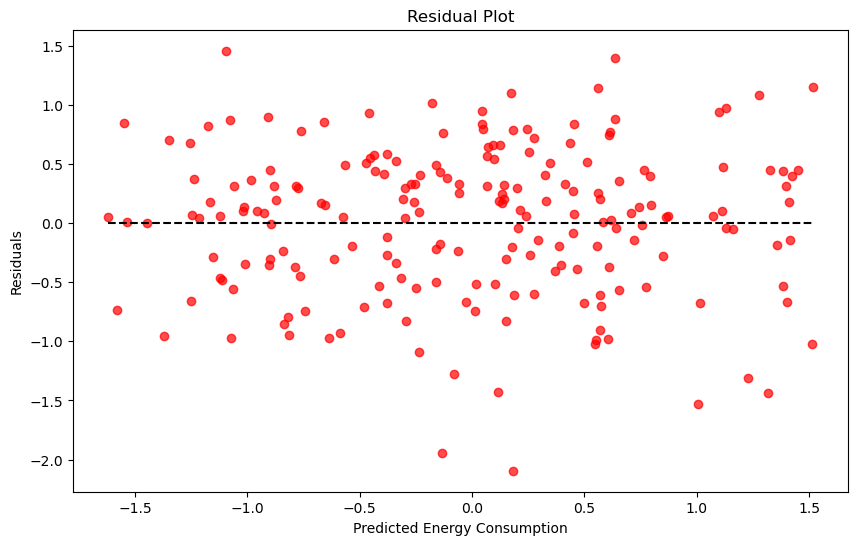

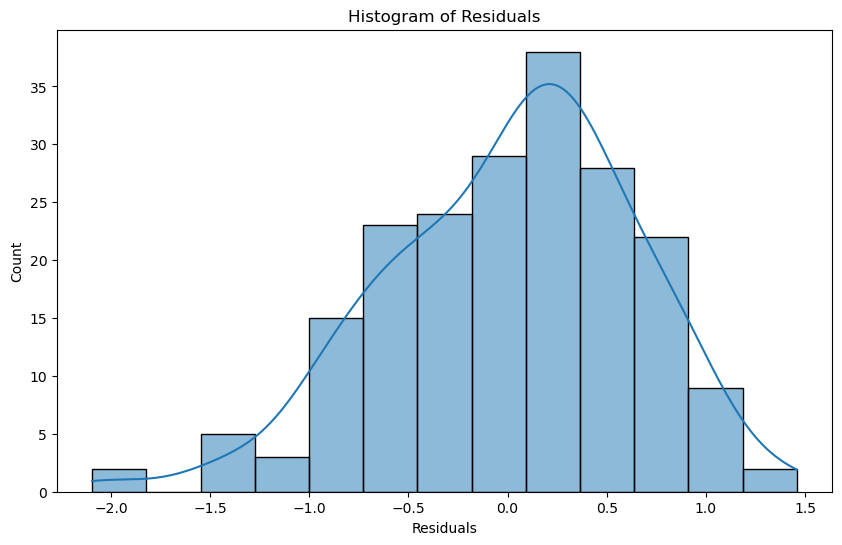

In [22]:
## RESIDUAL PLOT
# Calculating residuals
residuals = y_test - y_pred

# Plotting residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.7, color='r')
plt.hlines(y=0, xmin=min(y_pred), xmax=max(y_pred), color='k', linestyles='dashed')
plt.xlabel('Predicted Energy Consumption')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Histogram of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Histogram of Residuals')
plt.show()

Residual analysis: Ensure residuals are normally distributed and homoscedastic.

Residual Plot: This scatter plot helps to identify any patterns in the residuals (differences between actual and predicted values). Ideally, the residuals should be randomly scattered around zero, indicating that the model's errors are random.Which is seen from the plot, ensuring errors are random.

Histogram of Residuals: This plot helps to visualize the distribution of residuals. Ideally, the residuals should follow a normal distribution centered around zero. We can see that the residuals do follow a normal distribution.

In [23]:
from sklearn.metrics import r2_score
# Evaluating the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R-squared (R2): {r2:.2f}')


Mean Absolute Error (MAE): 0.50
Mean Squared Error (MSE): 0.39
Root Mean Squared Error (RMSE): 0.63
R-squared (R2): 0.60


## Model Performance:
Accuracy: The MAE, MSE, and RMSE values suggest that your model has reasonable accuracy, with relatively low prediction errors.

Explained Variance: An R^2 of 0.60 indicates that the model explains a significant portion of the variance in the data but also suggests that there is room for improvement.

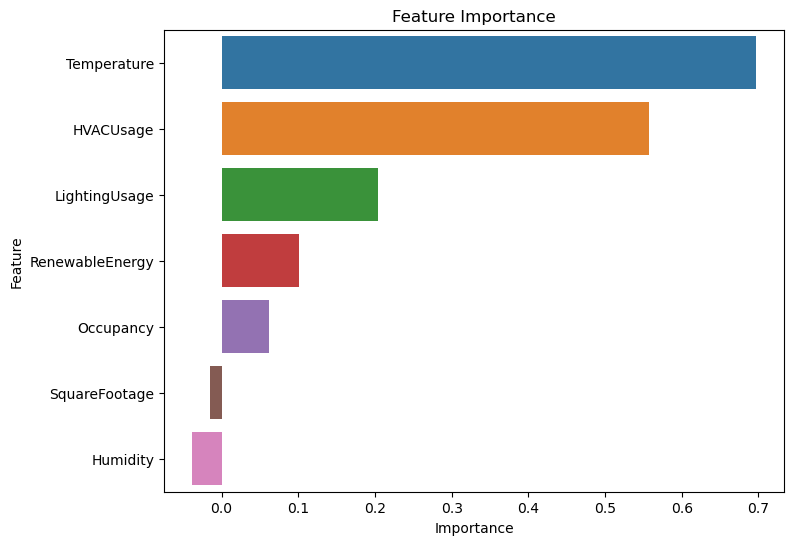

In [24]:
# Feature importance plot
importance = model.coef_
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importance})
feature_importance.sort_values(by='Importance', ascending=False, inplace=True)

plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

From the above feature selection, we find out that temperature is the most important feature that effect energy consumption.This is followed by HVACUsage and LightingUsage.Surprigingly, SquareFootage and Humidity affect energy consumption the least. 